**Load the Training Dataset**

In [3]:
# Step 1: Understanding the Dataset

# Import pandas library
import pandas as pd

# Read the Excel file into a DataFrame
df = pd.read_excel("DS_ML Coding Challenge Dataset (1)-Training.xlsx")

# Display the first few rows of the dataset
print(df.head())

# Display information about the dataset
print(df.info())


  ProductType Manufacturer Area Code Sourcing Channel Product Size  \
0        NTM3           X1       A28        WHOLESALE        Large   
1        NTM2           X1        A9           DIRECT        Large   
2        NTM3           X2       A20           DIRECT        Large   
3        NTM3           X1       A18        WHOLESALE        Small   
4        NTM2           X1       A28           DIRECT        Large   

  Product Type Month of Sourcing  Sourcing Cost  
0       Powder        2021-05-01         10.158  
1       Powder        2020-10-01        134.281  
2       Powder        2020-12-01         12.456  
3       Powder        2021-02-01        107.220  
4       Liquid        2020-11-01        197.763  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550176 entries, 0 to 550175
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   ProductType        550176 non-null  object        
 

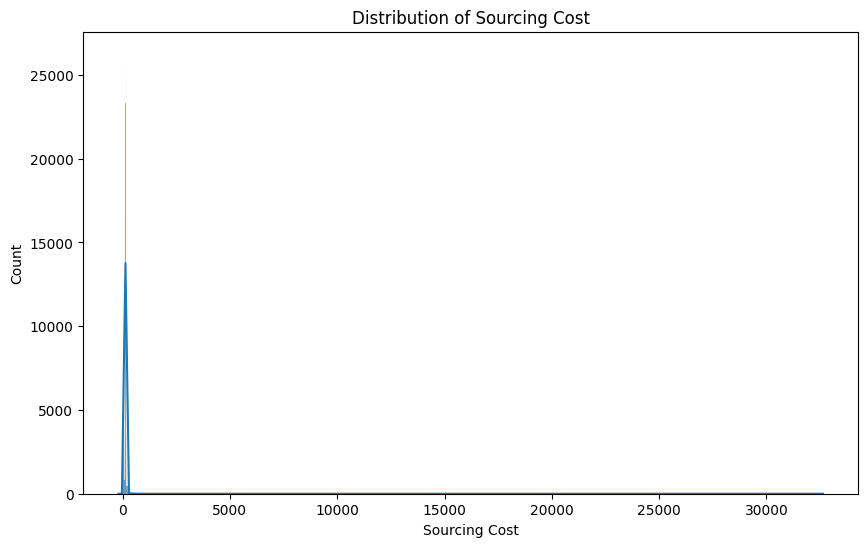

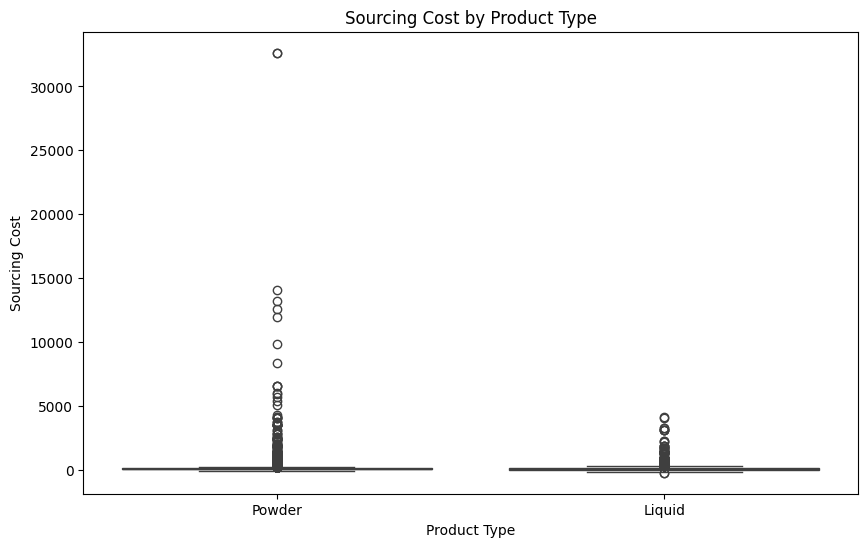

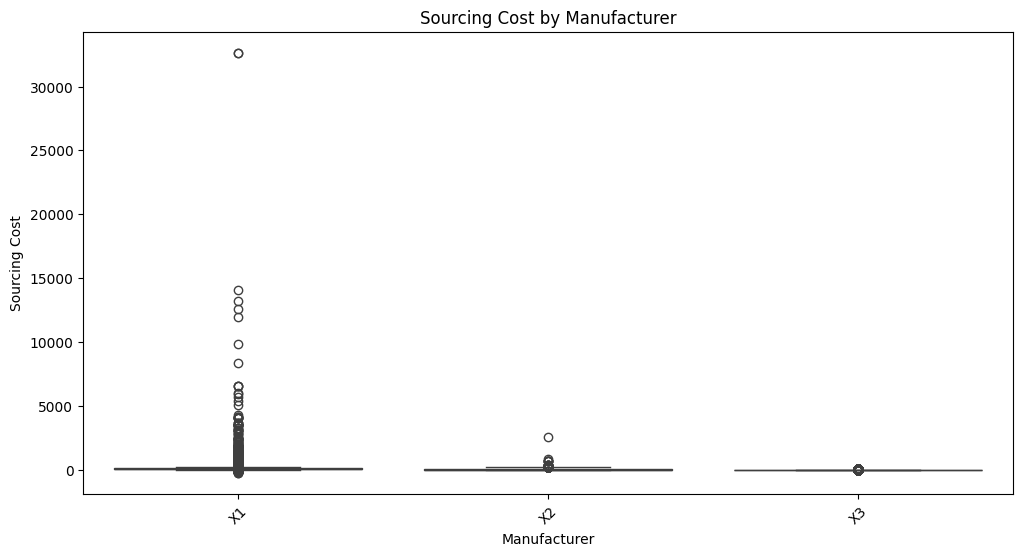

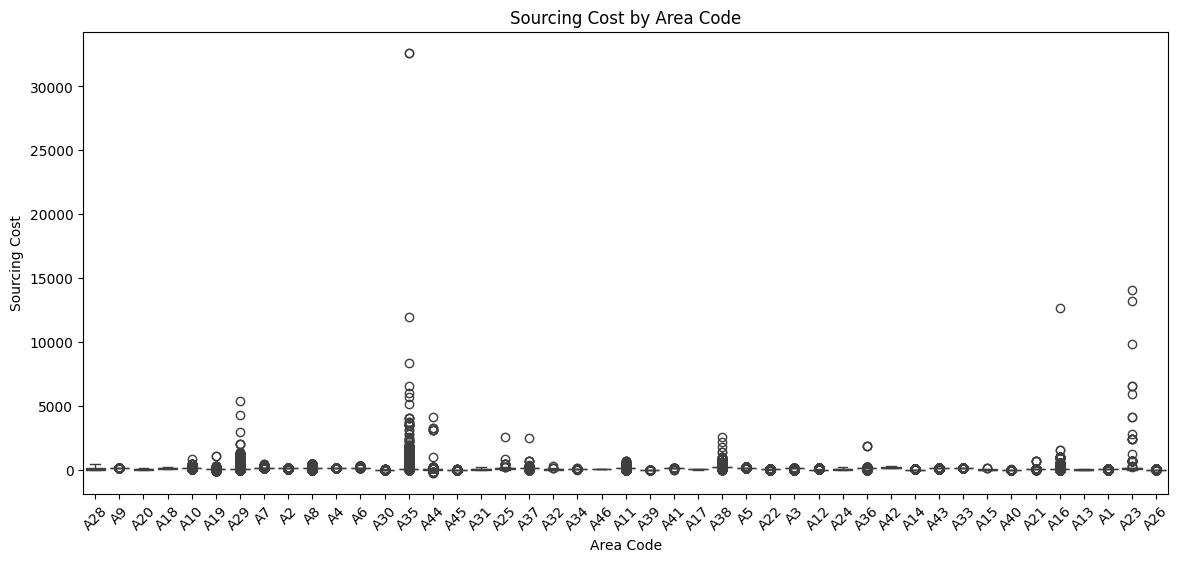

<ipython-input-4-7dd9fd5fd427>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month of Sourcing', y='Sourcing Cost', data=df,palette="Set1", estimator=np.mean)


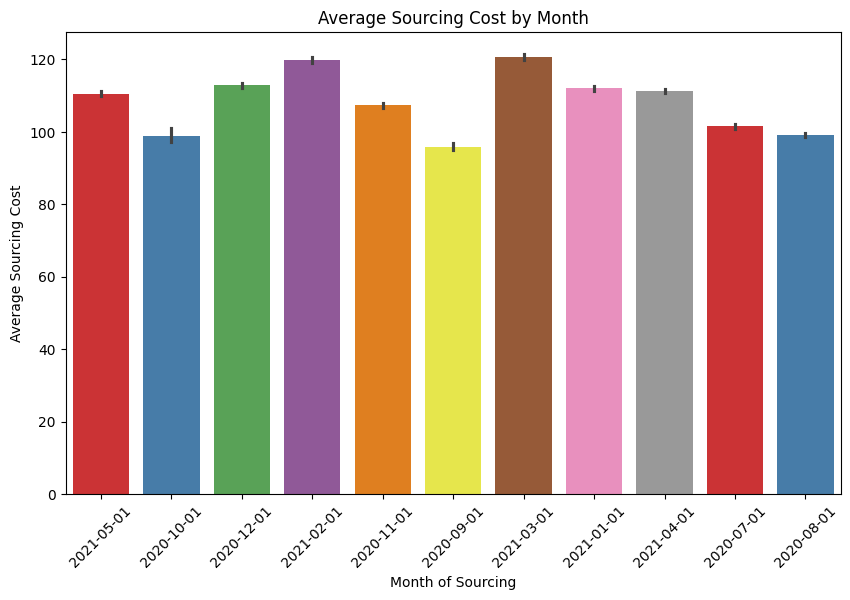

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Visualize the distribution of 'Sourcing Cost'
plt.figure(figsize=(10, 6))
sns.histplot(df['Sourcing Cost'], kde=True)
plt.title('Distribution of Sourcing Cost')
plt.xlabel('Sourcing Cost')
plt.show()


# Visualize the relationship between 'Sourcing Cost' and 'Product Type'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Product Type', y='Sourcing Cost', data=df)
plt.title('Sourcing Cost by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Sourcing Cost')
plt.show()

# Visualize the relationship between 'Sourcing Cost' and 'Manufacturer' using a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Manufacturer', y='Sourcing Cost', data=df)
plt.title('Sourcing Cost by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Sourcing Cost')
plt.xticks(rotation=45)
plt.show()

# Visualize the relationship between 'Sourcing Cost' and 'Area Code' using a boxplot
plt.figure(figsize=(14, 6))
sns.boxplot(x='Area Code', y='Sourcing Cost', data=df)
plt.title('Sourcing Cost by Area Code')
plt.xlabel('Area Code')
plt.ylabel('Sourcing Cost')
plt.xticks(rotation=45)
plt.show()

# Month-wise Sourcing Cost
plt.figure(figsize=(10, 6))
sns.barplot(x='Month of Sourcing', y='Sourcing Cost', data=df,palette="Set1", estimator=np.mean)
plt.title('Average Sourcing Cost by Month')
plt.xlabel('Month of Sourcing')
plt.ylabel('Average Sourcing Cost')
plt.xticks(rotation=45)
plt.show()

<ipython-input-5-d7ebeea33bf6>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sourcing Channel', data=df, palette='Set1')


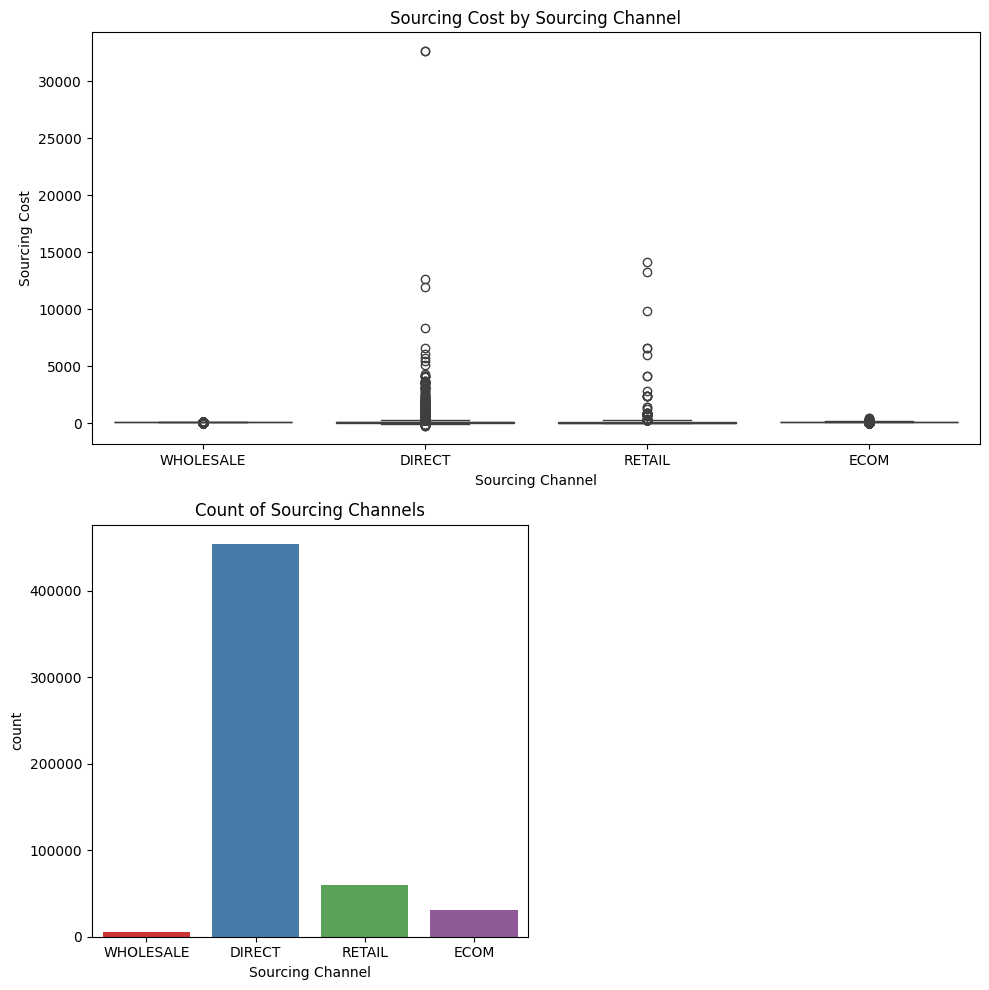

In [5]:
# Visualize the relationship between 'Sourcing Cost' and 'Sourcing Channel'

import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(10, 10))

# Boxplot for 'Sourcing Cost' by 'Sourcing Channel'
plt.subplot(2, 2, (1, 2))
sns.boxplot(x='Sourcing Channel', y='Sourcing Cost', data=df)
plt.title('Sourcing Cost by Sourcing Channel')
plt.xlabel('Sourcing Channel')
plt.ylabel('Sourcing Cost')

# Countplot for 'Sourcing Channel'
plt.subplot(2, 2, 3)
sns.countplot(x='Sourcing Channel', data=df, palette='Set1')
plt.title('Count of Sourcing Channels')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


**Data Preprocessing**

-Handle missing values- no missing values in this dataset, checked using train_df.isnull().sum())

-Check for outliers and decide on the appropriate treatment
-Encode categorical variables (if needed) using one-Hot encoding

Strategies for Handling Outliers and Poor Data Quality

1. Identification:
Statistical methods: To find data points that differ considerably from the majority, use methods like z-scores and the interquartile range (IQR).
To visually identify possible outliers, make scatter plots, boxplots, or histograms.
Understanding of the data and the problem domain.

2. Treatment:
Winsorization: Replace outlier values with values at particular percentiles to cap outliers to a given value within the upper or lower boundaries.
Trimming: Trimming is the process of removing a certain proportion of extreme values from the distribution's top and bottom.
Imputation: suitable techniques, such as mean/median imputation, or more complex approaches, such as KNN, to replace missing values.

4. Robust models:
Using models robust to outliers, such as robust regression techniques such as median absolute deviation (MAD) regression, decision trees, or robust versions of linear regression.

Preferred approach: We can Handle outliers using winsorization on this dataset by:
Winsorize the 'Sourcing Cost' column on train dataset
train_df['Sourcing Cost Winsorized'] = winsorize(train_df['Sourcing Cost'], (0.05, 0.05))

In [6]:
# Split the data into features and target variable
X = df.drop(columns=['Sourcing Cost'])
y = df['Sourcing Cost']

# Split the data into training and test sets
# Using data from July 2020 to May 2021 as the training set--Data for June 2021 will be used as the test set
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(X[X['Month of Sourcing'] < '2021-06-01'], test_size=0.2, random_state=42)
y_train, y_test = train_test_split(y[X['Month of Sourcing'] < '2021-06-01'], test_size=0.2, random_state=42)

# Drop 'Month of Sourcing' column as it's no longer needed
X_train = X_train.drop(columns=['Month of Sourcing'])
X_test = X_test.drop(columns=['Month of Sourcing'])


In [8]:
# Step 3: Data Preprocessing - Continued

# Combine training and test sets for one-hot encoding
combined_data = pd.concat([X_train, X_test], axis=0)

# One-hot encode categorical variables
combined_data_encoded = pd.get_dummies(combined_data)

# Split the combined data back into training and test sets
X_train_encoded = combined_data_encoded.iloc[:len(X_train)]
X_test_encoded = combined_data_encoded.iloc[len(X_train):]
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
# Initialize and train the models (after one-hot encoding)
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_encoded, y_train)

rf_model = RandomForestRegressor()
rf_model.fit(X_train_encoded, y_train)


RandomForestRegressor()

# **Model Selection and Evaluation**
1. Linear Regression
   
   -linear relationship between input features and target variable, making them suitable for forecasting tasks.

   -They are widely used regression techniques suitable for predicting continuous target variables.

   -It can capture nonlinear relationships between features and target variable.

2. Random Forest

   -It constructs numerous decision trees

   -random forests are less sensitive to outliers in the data.

   -prevents overfitting

3. Gradient Boosting Machines

   -Builds multiple decision trees sequentially.

   -Individually tree correct the error of previous one.

   -Thus, it results as strong prediction model.

In [ ]:
# Step 5: Model Evaluation

# Predictions on the test set
linear_reg_pred = linear_reg_model.predict(X_test_encoded)
rf_pred = rf_model.predict(X_test_encoded)

# Evaluate the models
linear_reg_rmse = mean_squared_error(y_test, linear_reg_pred, squared=False)
rf_rmse = mean_squared_error(y_test, rf_pred, squared=False)

print("Linear Regression RMSE:", linear_reg_rmse)
print("Random Forest RMSE:", rf_rmse)

from sklearn.metrics import r2_score

# Calculate R^2 score
linear_reg_r2 = r2_score(y_test, linear_reg_pred)
rf_r2 = r2_score(y_test, rf_pred)

print("Linear Regression R^2 Score:", linear_reg_r2)
print("Random Forest R^2 Score:", rf_r2)


Linear Regression RMSE: 57.699590431220216
Random Forest RMSE: 56.119365754479645
Linear Regression R^2 Score: 0.41484023940213066
Random Forest R^2 Score: 0.44645300059485404


In [9]:
#Trained model using Gradient Boosting Regressor model for iterating ML model

from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor()

# Train the model
gb_model.fit(X_train_encoded, y_train)

# Make predictions on the test dataset
gb_predictions = gb_model.predict(X_test_encoded)

# Evaluate the model
gb_rmse = mean_squared_error(y_test, gb_predictions, squared=False)
print("Gradient Boosting RMSE:", gb_rmse)

Gradient Boosting RMSE: 57.81978164639941


In [10]:
import pandas as pd

# Load the test dataset
test_data = pd.read_excel("DS_ML Coding Challenge Dataset (1) (1)-Test.xlsx")

# Display first few rows of the test dataset
print("Test Data:")
print(test_data.head())


Test Data:
  ProductType Manufacturer Area Code Sourcing Channel Product Size  \
0        NTM1           X1        A1           DIRECT        Small   
1        NTM1           X1       A10           DIRECT        Large   
2        NTM1           X1       A10             ECOM        Large   
3        NTM1           X1       A11           DIRECT        Large   
4        NTM1           X1        A2           DIRECT        Large   

  Product Type Month of Sourcing  Sourcing Cost  
0       Powder        2021-06-21         103.68  
1       Powder        2021-06-21         155.75  
2       Powder        2021-06-21         143.02  
3       Powder        2021-06-21         139.39  
4       Powder        2021-06-21         169.42  


In [11]:
# Data Preprocessing for Test Dataset

# Drop 'Month of Sourcing' column
test_data_processed = test_data.drop(columns=['Month of Sourcing'])

# One-hot encode categorical variables using the same encoding as the training dataset
test_data_encoded = pd.get_dummies(test_data_processed)

# Ensure that the test dataset has the same columns as the training dataset after one-hot encoding
# Assuming combined_data_encoded is the combined dataset used for training and test
missing_cols = set(X_train_encoded.columns) - set(test_data_encoded.columns)
for col in missing_cols:
    test_data_encoded[col] = 0

# Reorder columns to match the order of columns in the training dataset
test_data_encoded = test_data_encoded[X_train_encoded.columns]

# Display the preprocessed test dataset
print("Preprocessed Test Data:")
print(test_data_encoded.head())


Preprocessed Test Data:
   ProductType_NTM1  ProductType_NTM2  ProductType_NTM3  Manufacturer_X1  \
0              True             False             False             True   
1              True             False             False             True   
2              True             False             False             True   
3              True             False             False             True   
4              True             False             False             True   

   Manufacturer_X2  Manufacturer_X3  Area Code_A1  Area Code_A10  \
0            False            False          True          False   
1            False            False         False           True   
2            False            False         False           True   
3            False            False         False          False   
4            False            False         False          False   

   Area Code_A11  Area Code_A12  ...  Area Code_A9  Sourcing Channel_DIRECT  \
0          False          False

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import OneHotEncoder

# Assuming 'encoder' is a OneHotEncoder object
encoder = OneHotEncoder()

# Fit and transform the training data
X_train_encoded = encoder.fit_transform(X_train)

# Transform the testing data
X_test_encoded = encoder.transform(X_test)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Initialize the models
linear_reg_model = LinearRegression()
rf_model = RandomForestRegressor()

# Fit the models
linear_reg_model.fit(X_train_encoded, y_train)
rf_model.fit(X_train_encoded, y_train)

# Make predictions
linear_reg_predictions = linear_reg_model.predict(X_test_encoded)
rf_predictions = rf_model.predict(X_test_encoded)

# Evaluate linear regression model
linear_reg_rmse = mean_squared_error(y_test, linear_reg_predictions, squared=False)
linear_reg_mae = mean_absolute_error(y_test, linear_reg_predictions)
linear_reg_r2 = r2_score(y_test, linear_reg_predictions)

# Evaluate random forest model
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

# Forecasting for June 2021 using the best-performing model (Random Forest)
# Assuming X_test_encoded contains the features for June 2021
june_21_forecast = rf_model.predict(X_test_encoded)

# Print evaluation metrics
print("Linear Regression RMSE:", linear_reg_rmse)
print("Random Forest RMSE:", rf_rmse)


Linear Regression RMSE: 57.509607681561576
Random Forest RMSE: 55.304871377950924


# **COMPARISON METRICS FOR COMPARISON BETWEEN MODELS**

In [14]:
#Using ML models to approach forecasting

# Evaluate linear regression model
linear_reg_rmse = mean_squared_error(y_test, linear_reg_predictions, squared=False)
linear_reg_mae = mean_absolute_error(y_test, linear_reg_predictions)
linear_reg_r2 = r2_score(y_test, linear_reg_predictions)

# Evaluate random forest model
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

# Evaluate gradient boosting model
gb_mae = mean_absolute_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)

print("Linear Regression:")
print("RMSE:",linear_reg_rmse)
print("MAE:",linear_reg_mae)
print("R2:",linear_reg_r2)

print("\nRandom Forest:")
print("RMSE:",rf_rmse)
print("MAE:",rf_mae)
print("R2 :",rf_r2)

print("\nGradient Boosting")
print("RMSE:", gb_rmse)
print("MAE:", gb_mae)
print("R^2 Score:", gb_r2)

Linear Regression:
RMSE: 57.509607681561576
MAE: 20.774864258048765
R2: 0.41868731141218374

Random Forest:
RMSE: 55.304871377950924
MAE: 12.439692600961505
R2 : 0.46240432517690044

Gradient Boosting
RMSE: 57.81978164639941
MAE: 21.889174051688375
R^2 Score: 0.4123998645646345


In [17]:
# Make predictions on the test data
linear_reg_predictions = linear_reg_model.predict(X_test_encoded)
rf_predictions = rf_model.predict(X_test_encoded)

# Display the test predictions
print("Test Predictions (Random Forest):")
print(rf_predictions)

Test Predictions (Random Forest):
[153.54437208 147.58353201  24.91421437 ...  24.60236475 150.80619357
 174.828     ]


# **FINAL APPROACH**

After analyzing these models, I decided to forecast June 2021 values using Random Forest because of their better performance metrics (lower MAE, RMSE, and higher R2 score).

When compared to random forests and linear regression, RF had lower error rates, higher accuracy.
It is also a good fit for forecasting as  because of their efficiency, scalability, it performed really well with outliers as well.

In [19]:
# Predictions on the test set for June 2021 using Random Forest
rf_predictions_june_2021 = rf_model.predict(X_test_encoded)

# Display actual and predicted values for June 2021 (first few rows)
print("Actual and Predicted Sourcing Cost for June 2021 (Random Forest):")
for actual, predicted in zip(y_test[:15], rf_predictions_june_2021[:15]):
    print(f"Actual: {actual:.2f}, Predicted: {predicted:.2f}")


Actual and Predicted Sourcing Cost for June 2021 (Random Forest):
Actual: 151.69, Predicted: 153.54
Actual: 144.89, Predicted: 147.58
Actual: 24.48, Predicted: 24.91
Actual: 116.29, Predicted: 114.62
Actual: 0.00, Predicted: 68.76
Actual: 24.31, Predicted: 22.13
Actual: 95.00, Predicted: 95.12
Actual: 69.13, Predicted: 92.47
Actual: 1.21, Predicted: 14.06
Actual: 384.49, Predicted: 180.14
Actual: 24.48, Predicted: 24.91
Actual: 109.13, Predicted: 108.62
Actual: 97.52, Predicted: 97.13
Actual: 136.47, Predicted: 135.30
Actual: 168.01, Predicted: 143.22


In [20]:

# Use the best performing model (e.g., rf_model) for prediction
june_21st_forecast = rf_model.predict(X_test_encoded)

# Print the forecast for June 21st
print("Forecasted Sourcing Cost for June 21st:", june_21st_forecast[0])


Forecasted Sourcing Cost for June 21st: 153.5443720840734


**Random Forest model seem to have done well when the actual and expected sourcing prices for June 2021 is predicted on test dataset.**

**Compare and explain the different approaches you might have considered:**

Machine learning regression models like Linear Regression, Random Forest Regression, or Gradient Boosting Regression learns the relationship between input features and target variable, making them suitable for forecasting tasks.

I used this approach as it can capture nonlinear relationships between features and target variable.

**Some more Approaches for Forecasting June 21 Test Set:**

I used the final model prediction approach between linear regression model and random forest model

1. Final Model Prediction: To forecast the sourcing cost for the test set on June 21, use the top-performing model (such as implemented and found random forest as the best among the rest two) that was trained on the cleaned data.

2. Time Series Forecasting (if applicable): To identify potential seasonal trends that could affect sourcing costs in June, take into account using time series forecasting techniques such as ARIMA or Prophet if you have historical data for June.

3. Advanced ensembling: We can combine several models with their predictions to construct an ensemble model that may increase accuracy.

**Choosing the Final Approach for Forecasting June 21st:**

I chose random forest regression model, a well-performing model which I trained on high-quality data. This often provides the most accurate forecast.
I calculated the forecasting cost as well.